# Análise Exploratória Inicial e Engenharia de Atributos

### Principais problemas de negócio
- Previsão de vendas de empresa varejista
- Previsão de custos e margem líquida
- Verficiar projeção de crescimento
- Categorias e produtos em alta, bem como em baixa
- Projeção de lucro e custos por estado 
- Horas com maiores volumes de vendas
- Dia da semana com maiores volumes de vendas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

In [2]:
# Importação do dataset
data = pd.read_csv('../data/dados_vendas.csv', sep=',')

In [4]:
data.sample(5)

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
63950,2019-05-15 17:39:00,202535,USB-C Charging Cable,3.728742e+12,Alimentation,"290 Johnson St, Portland, OR 97035",1,11.95,5.975,11.95,5.975
123877,2019-10-24 12:01:00,260103,AAA Batteries (4-pack),7.980370e+12,Vêtements,"327 11th St, New York City, NY 10001",4,2.99,1.495,11.96,5.980
97116,2019-07-30 10:11:00,234359,Bose SoundSport Headphones,5.086547e+12,Électronique,"109 7th St, New York City, NY 10001",1,99.99,49.995,99.99,49.995
33931,2019-03-06 12:52:00,173771,AA Batteries (4-pack),1.827628e+12,Alimentation,"619 Church St, Atlanta, GA 30301",1,3.84,1.920,3.84,1.920
47888,2019-04-18 13:37:00,187175,Google Phone,1.366424e+12,Alimentation,"111 Elm St, Los Angeles, CA 90001",1,600.00,198.000,600.00,402.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [6]:
data.nunique()

Order Date          142395
Order ID            178437
Product                 19
Product_ean         185950
catégorie                4
Purchase Address    140787
Quantity Ordered         9
Price Each              17
Cost price              17
turnover                53
margin                  54
dtype: int64

In [7]:
data.isna().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [8]:
data.columns

Index(['Order Date', 'Order ID', 'Product', 'Product_ean', 'catégorie',
       'Purchase Address', 'Quantity Ordered', 'Price Each', 'Cost price',
       'turnover', 'margin'],
      dtype='object')

In [9]:
# Renomeando as colunas do DF

nomes_colunas = {
 'Product': 'Produto',
 'catégorie': 'Categoria',
 'Purchase Address': 'Endereco_Entrega',
 'Quantity Ordered': 'Quantidade_Comprada',
 'Price Each': 'Preco_Unitario',
 'Cost price': 'Custo',
 'turnover': 'Faturamento',
 'margin': 'Lucro_Bruto'
}

data.rename(columns = nomes_colunas, inplace= True)
data.columns

Index(['Order Date', 'Order ID', 'Produto', 'Product_ean', 'Categoria',
       'Endereco_Entrega', 'Quantidade_Comprada', 'Preco_Unitario', 'Custo',
       'Faturamento', 'Lucro_Bruto'],
      dtype='object')

In [10]:
data.sample(5)

,Order Date,Order ID,Produto,Product_ean,Categoria,Endereco_Entrega,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto
110726,2019-08-31 15:36:00,247450,Macbook Pro Laptop,8.274716e+12,Électronique,"803 Chestnut St, San Francisco, CA 94016",1,1700.00,561.0000,1700.00,1139.0000
154500,2019-11-27 13:32:00,289463,iPhone,5.275674e+12,Alimentation,"60 13th St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
168120,2019-12-07 20:37:00,302532,34in Ultrawide Monitor,4.941928e+12,Vêtements,"255 Madison St, Portland, ME 04101",1,379.99,125.3967,379.99,254.5933
59744,2019-05-13 18:56:00,198514,USB-C Charging Cable,2.159120e+12,Électronique,"171 Jackson St, Seattle, WA 98101",1,11.95,5.9750,11.95,5.9750
70950,2019-05-11 17:40:00,209242,USB-C Charging Cable,6.820877e+12,Électronique,"508 Meadow St, Dallas, TX 75001",1,11.95,5.9750,11.95,5.9750


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Order Date           185950 non-null  object 
 1   Order ID             185950 non-null  int64  
 2   Produto              185950 non-null  object 
 3   Product_ean          185950 non-null  float64
 4   Categoria            185950 non-null  object 
 5   Endereco_Entrega     185950 non-null  object 
 6   Quantidade_Comprada  185950 non-null  int64  
 7   Preco_Unitario       185950 non-null  float64
 8   Custo                185950 non-null  float64
 9   Faturamento          185950 non-null  float64
 10  Lucro_Bruto          185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [13]:
data['Produto'].value_counts().reset_index()

,Produto,count
0,USB-C Charging Cable,21903
1,Lightning Charging Cable,21658
2,AAA Batteries (4-pack),20641
3,AA Batteries (4-pack),20577
4,Wired Headphones,18882
5,Apple Airpods Headphones,15549
6,Bose SoundSport Headphones,13325
7,27in FHD Monitor,7507
8,iPhone,6842
9,27in 4K Gaming Monitor,6230


#### Traduzino os nomes dos 19 Produtos, para melhor visualização

In [14]:
muda_nome_produtos = {
 'USB-C Charging Cable': 'Cabo de Carregamento USB-C',
 'Lightning Charging Cable': 'Cabo de Carregamento Turbo',
 'AAA Batteries (4-pack)': 'Pilhas AAA (4 Unidades)',
 'AA Batteries (4-pack)': 'Pilhas AA (4 Unidades)',
 'Wired Headphones': 'Fone de Ouvido Sem Fio',
 'Apple Airpods Headphones': 'Apple Airpods',
 'Bose SoundSport Headphones': 'Fone de Ouvido Esportivo Bose',
 '27in FHD Monitor': 'Monitor 27" Full HD',
 'iPhone': 'iPhone',
 '27in 4K Gaming Monitor': 'Monitor gamer 27" 4K',
 '34in Ultrawide Monitor': 'Monitor Ultrawide 34"',
 'Google Phone': 'Google Phone',
 'Flatscreen TV': 'TV Tela Plana',
 'Macbook Pro Laptop': 'Notebook Macbook Pro',
 'ThinkPad Laptop': 'Notebook ThinkPad',
 '20in Monitor': 'Monitor 20"',
 'Vareebadd Phone': 'Smartphone Vareebadd',
 'LG Washing Machine': 'Máquina de Lavar Roupas LG',
 'LG Dryer': 'Secador LG'
}

In [16]:
# Mapeando a coluna 
data['Produto'] = data['Produto'].map(muda_nome_produtos)

In [18]:
# VERIFICANDO QUANTITATIVO COMPRADO 
data['Produto'].value_counts().reset_index()

,Produto,count
0,Cabo de Carregamento USB-C,21903
1,Cabo de Carregamento Turbo,21658
2,Pilhas AAA (4 Unidades),20641
3,Pilhas AA (4 Unidades),20577
4,Fone de Ouvido Sem Fio,18882
5,Apple Airpods,15549
6,Fone de Ouvido Esportivo Bose,13325
7,"Monitor 27"" Full HD",7507
8,iPhone,6842
9,"Monitor gamer 27"" 4K",6230


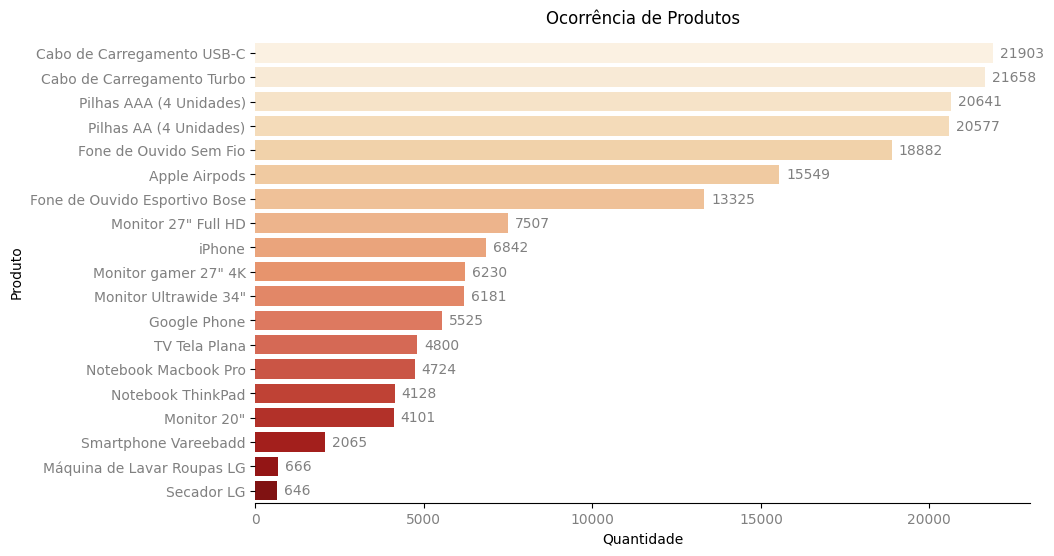

In [66]:
contagem = data['Produto'].value_counts().reset_index()

# Renomeando a coluna de contagem para 'Quantidade'
contagem = contagem.rename(columns={'count': 'Quantidade'})

# Criando o gráfico de barras horizontais
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
ax = sns.barplot(x='Quantidade', y='Produto', data=contagem, palette='OrRd')  # Cria o gráfico com Seaborn

# Adicionando os valores nas pontas das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='gray', xytext=(5, 0),
                textcoords='offset points')

plt.xlabel('Quantidade')  # Adiciona o rótulo do eixo x
plt.ylabel('Produto')     # Adiciona o rótulo do eixo y
plt.title('Ocorrência de Produtos', y = 1.02)  # Adiciona o título do gráfico
plt.yticks(color = 'gray')
plt.xticks(color = 'gray')
sns.despine(left=True, right=True, top=True)
plt.show()

In [65]:
data.sample(5)

,Order Date,Order ID,Produto,Product_ean,Categoria,Endereco_Entrega,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto
42693,2019-04-09 15:28:00,182193,Pilhas AAA (4 Unidades),7.836605e+12,Vêtements,"202 Pine St, San Francisco, CA 94016",1,2.99,1.495,2.99,1.495
34772,2019-03-10 22:17:00,174582,Fone de Ouvido Sem Fio,4.808623e+12,Alimentation,"28 Walnut St, Los Angeles, CA 90001",1,11.99,5.995,11.99,5.995
150442,2019-11-09 21:55:00,285582,Pilhas AA (4 Unidades),4.101070e+12,Électronique,"477 Meadow St, New York City, NY 10001",2,3.84,1.920,7.68,3.840
2151,2019-01-22 22:58:00,143283,Pilhas AAA (4 Unidades),2.877839e+12,Électronique,"757 Lincoln St, Austin, TX 73301",1,2.99,1.495,2.99,1.495
62664,2019-05-31 21:03:00,201306,Cabo de Carregamento Turbo,5.951548e+12,Vêtements,"530 Dogwood St, Los Angeles, CA 90001",1,14.95,7.475,14.95,7.475


#### Mudando nome de Categoria

In [90]:
muda_nome_cat = {
 'Sports': 'Esportes',
 'Vêtements': 'Roupas',
 'Alimentation': 'Alimentação',
 'Électronique': 'Eletrônica'
 }

In [91]:
# Mapeando a coluna Categoria
data['Categoria'] = data['Categoria'].map(muda_nome_cat)

In [92]:
data.sample(5)

,Order Date,Order ID,Produto,Product_ean,Categoria,Endereco_Entrega,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto
57712,2019-05-02 00:15:00,196576,Apple Airpods,2.529800e+12,Eletrônica,"425 5th St, Los Angeles, CA 90001",1,150.00,97.500,150.00,52.500
81330,2019-06-13 22:25:00,219177,Pilhas AAA (4 Unidades),3.031404e+12,Alimentação,"867 Washington St, Portland, ME 04101",2,2.99,1.495,5.98,2.990
160128,2019-11-03 09:29:00,294859,Cabo de Carregamento USB-C,2.075752e+12,Eletrônica,"73 Hickory St, Atlanta, GA 30301",1,11.95,5.975,11.95,5.975
88557,2019-07-24 20:13:00,226121,Cabo de Carregamento Turbo,7.272728e+12,Roupas,"434 Elm St, San Francisco, CA 94016",1,14.95,7.475,14.95,7.475
177535,2019-12-05 19:03:00,311588,Notebook Macbook Pro,3.795714e+12,Eletrônica,"27 10th St, Seattle, WA 98101",1,1700.00,561.000,1700.00,1139.000


## Primeiras Decisões 

- Vou excluir a coluna "Product_ean", pois não representa informação que será válida para o problema,
- Vou excluir a coluna "Order ID", pois também não representa informação útil,
- Na coluna "Endereço_Entrega", irei deixar apenas o nome do estado
- A coluna "Order Date" será excluída e dará 'vida' a 3 novas colunas, são elas:
  - "Horario": Representando o horário da venda
  - "Data": Representando o dia da venda
  - "Dia_Semana": Representando o dia da semana em que a compra foi realizada
- A coluna "Custo_Produto" não está calculando o custo pela quantidade comprada, apenas pela quantidade unitária, farei essa correção também

In [93]:
data = data.drop('Product_ean', axis= 1)
data = data.drop('Order ID', axis= 1)

In [94]:
data.sample(5)

,Order Date,Produto,Categoria,Endereco_Entrega,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto
92520,2019-07-05 17:18:00,Fone de Ouvido Sem Fio,Alimentação,"923 Church St, Seattle, WA 98101",1,11.99,5.995,11.99,5.995
84346,2019-06-01 13:02:00,Pilhas AA (4 Unidades),Roupas,"553 8th St, Los Angeles, CA 90001",1,3.84,1.920,3.84,1.920
166304,2019-12-17 14:20:00,TV Tela Plana,Esportes,"66 Church St, Los Angeles, CA 90001",1,300.00,99.000,300.00,201.000
27691,2019-03-26 14:36:00,Cabo de Carregamento USB-C,Alimentação,"868 Madison St, New York City, NY 10001",2,11.95,5.975,23.90,11.950
65849,2019-05-14 19:18:00,Cabo de Carregamento USB-C,Esportes,"603 Park St, San Francisco, CA 94016",1,11.95,5.975,11.95,5.975


In [95]:
frase = '941 Jefferson St, Boston, MA 02215'

# Usando regex para encontrar o estado (TX)
padrao = r',\s*([A-Z]{2})\s+\d{5}$'
correspondencia = re.search(padrao, frase)

correspondencia[1]

'MA'

#### Utilizando REGEX para criar novas colunas, com informações de Estado e Cidade

In [96]:
# Funçao para nome de estado 
def nome_estado(str):
 padrao_re = r',\s*([A-Z]{2})\s+\d{5}$'
 estado = re.search(padrao_re, str)

 return estado[1]

In [97]:
# Aplicando a função e nova coluna
data['Estado'] = data['Endereco_Entrega'].map(nome_estado)

In [98]:
frase = '55 Willow St, Atlanta, GA 30301'

# Usando regex para encontrar o nome da cidade (assume que a cidade segue o estado)
padrao = r',\s*([A-Z][a-z\s]+),\s*[A-Z]{2}'
correspondencia = re.search(padrao, frase)

correspondencia[1]

'Atlanta'

In [99]:
# Função para nome de cidade
def nome_cidade(x):
 padrao = r',\s*([^,]+),\s*[A-Z]{2}'
 cidade = re.search(padrao, x)

 return cidade[1]

In [100]:
data['Cidade'] = data['Endereco_Entrega'].map(nome_cidade)

In [101]:
# Como já crei as colunas cidade e estado, excluirei a coluna Endereço_Entrega
data = data.drop('Endereco_Entrega', axis= 1)

In [102]:
data.head(5)

,Order Date,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade
0,2019-01-22 21:25:00,iPhone,Roupas,1,700.00,231.0000,700.00,469.0000,MA,Boston
1,2019-01-28 14:15:00,Cabo de Carregamento Turbo,Alimentação,1,14.95,7.4750,14.95,7.4750,OR,Portland
2,2019-01-17 13:33:00,Fone de Ouvido Sem Fio,Roupas,2,11.99,5.9950,23.98,11.9900,CA,San Francisco
3,2019-01-05 20:33:00,"Monitor 27"" Full HD",Esportes,1,149.99,97.4935,149.99,52.4965,CA,Los Angeles
4,2019-01-25 11:59:00,Fone de Ouvido Sem Fio,Eletrônica,1,11.99,5.9950,11.99,5.9950,TX,Austin


### Trabalhando com a coluna "Order Date"

- A coluna está com o tipo 'object', passarei para datetime e trabalharei com ela

In [103]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [104]:
# Construindo novas colunas
data['Horario_Venda'] = data['Order Date'].dt.hour
data['Data_Venda'] = data['Order Date'].dt.date

In [105]:
# Dia da semana em que foi realizada a compra
data['Dia_Semana'] = data['Order Date'].dt.weekday

In [106]:
# Excluindo coluna Order Date
data = data.drop('Order Date', axis= 1)

In [107]:
data.head(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana
0,iPhone,Roupas,1,700.00,231.0000,700.00,469.0000,MA,Boston,21,2019-01-22,1
1,Cabo de Carregamento Turbo,Alimentação,1,14.95,7.4750,14.95,7.4750,OR,Portland,14,2019-01-28,0
2,Fone de Ouvido Sem Fio,Roupas,2,11.99,5.9950,23.98,11.9900,CA,San Francisco,13,2019-01-17,3
3,"Monitor 27"" Full HD",Esportes,1,149.99,97.4935,149.99,52.4965,CA,Los Angeles,20,2019-01-05,5
4,Fone de Ouvido Sem Fio,Eletrônica,1,11.99,5.9950,11.99,5.9950,TX,Austin,11,2019-01-25,4


##### Ajustando valor de custo produto
- Pois está levando em consideração apenas o valor unitário, não está contando com as quantidades

In [111]:
# Aplicando com a função map
data['Custo'] = np.where(data['Quantidade_Comprada'] > 1, data['Custo']* data['Quantidade_Comprada'],data['Custo'])

In [112]:
data[data['Quantidade_Comprada']>1].sample(5)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana
160029,Pilhas AAA (4 Unidades),Alimentação,2,2.99,2.990,5.98,2.990,CA,Los Angeles,11,2019-11-15,4
159447,Pilhas AAA (4 Unidades),Alimentação,2,2.99,2.990,5.98,2.990,CA,Los Angeles,16,2019-11-06,2
60514,Pilhas AAA (4 Unidades),Esportes,3,2.99,4.485,8.97,4.485,TX,Dallas,12,2019-05-06,0
175051,Pilhas AAA (4 Unidades),Eletrônica,2,2.99,2.990,5.98,2.990,CA,San Francisco,23,2019-12-01,6
137383,Fone de Ouvido Sem Fio,Esportes,2,11.99,11.990,23.98,11.990,CA,Los Angeles,11,2019-10-02,2


In [113]:
# Mudando nome coluna de "Custo_Produto" para "Custo_Pedido"
data

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana
0,iPhone,Roupas,1,700.00,231.0000,700.00,469.0000,MA,Boston,21,2019-01-22,1
1,Cabo de Carregamento Turbo,Alimentação,1,14.95,7.4750,14.95,7.4750,OR,Portland,14,2019-01-28,0
2,Fone de Ouvido Sem Fio,Roupas,2,11.99,11.9900,23.98,11.9900,CA,San Francisco,13,2019-01-17,3
3,"Monitor 27"" Full HD",Esportes,1,149.99,97.4935,149.99,52.4965,CA,Los Angeles,20,2019-01-05,5
4,Fone de Ouvido Sem Fio,Eletrônica,1,11.99,5.9950,11.99,5.9950,TX,Austin,11,2019-01-25,4
...,...,...,...,...,...,...,...,...,...,...,...,...
185945,Cabo de Carregamento Turbo,Eletrônica,1,14.95,7.4750,14.95,7.4750,CA,San Francisco,20,2019-12-11,2
185946,Pilhas AA (4 Unidades),Eletrônica,2,3.84,3.8400,7.68,3.8400,CA,Los Angeles,12,2019-12-01,6
185947,Smartphone Vareebadd,Alimentação,1,400.00,132.0000,400.00,268.0000,WA,Seattle,6,2019-12-09,0
185948,Fone de Ouvido Sem Fio,Alimentação,1,11.99,5.9950,11.99,5.9950,TX,Dallas,10,2019-12-03,1


In [114]:
# Renomeando a coluna de dia da semana
mapeamento_dia_semana = {
 0: 'Segunda-Feira',
 1: 'Terça-Feira',
 2: 'Quarta-Feira',
 3: 'Quinta-Feria',
 4: 'Sexta-Feira',
 5: 'Sábado',
 6: 'Domingo'
}

In [115]:
# Aplicando o mapeamento
data['Dia_Semana'] = data['Dia_Semana'].map(mapeamento_dia_semana)

In [116]:
data.sample(10)

,Produto,Categoria,Quantidade_Comprada,Preco_Unitario,Custo,Faturamento,Lucro_Bruto,Estado,Cidade,Horario_Venda,Data_Venda,Dia_Semana
175452,iPhone,Eletrônica,1,700.00,231.0000,700.00,469.0000,GA,Atlanta,14,2019-12-20,Sexta-Feira
31624,Pilhas AAA (4 Unidades),Alimentação,1,2.99,1.4950,2.99,1.4950,NY,New York City,22,2019-03-09,Sábado
35279,Apple Airpods,Roupas,1,150.00,97.5000,150.00,52.5000,WA,Seattle,21,2019-03-01,Sexta-Feira
184881,Pilhas AA (4 Unidades),Alimentação,1,3.84,1.9200,3.84,1.9200,TX,Dallas,14,2019-12-19,Quinta-Feria
23109,Pilhas AA (4 Unidades),Esportes,1,3.84,1.9200,3.84,1.9200,CA,San Francisco,0,2019-03-21,Quinta-Feria
173969,Cabo de Carregamento USB-C,Esportes,1,11.95,5.9750,11.95,5.9750,CA,San Francisco,17,2019-12-16,Segunda-Feira
38618,Fone de Ouvido Sem Fio,Roupas,1,11.99,5.9950,11.99,5.9950,MA,Boston,13,2019-04-24,Quarta-Feira
100474,Apple Airpods,Alimentação,1,150.00,97.5000,150.00,52.5000,CA,San Francisco,20,2019-08-30,Sexta-Feira
83237,"Monitor Ultrawide 34""",Esportes,1,379.99,125.3967,379.99,254.5933,CA,San Francisco,10,2019-06-25,Terça-Feira
1035,Fone de Ouvido Sem Fio,Esportes,1,11.99,5.9950,11.99,5.9950,TX,Austin,20,2019-01-31,Quinta-Feria


In [117]:
data['Data_Venda'] = pd.to_datetime(data['Data_Venda'])

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Produto              185950 non-null  object        
 1   Categoria            185950 non-null  object        
 2   Quantidade_Comprada  185950 non-null  int64         
 3   Preco_Unitario       185950 non-null  float64       
 4   Custo                185950 non-null  float64       
 5   Faturamento          185950 non-null  float64       
 6   Lucro_Bruto          185950 non-null  float64       
 7   Estado               185950 non-null  object        
 8   Cidade               185950 non-null  object        
 9   Horario_Venda        185950 non-null  int32         
 10  Data_Venda           185950 non-null  datetime64[ns]
 11  Dia_Semana           185950 non-null  object        
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(5)
memory u

## Salvando DataFrame modificado, para posterior análise exploratória 

In [119]:
data.to_csv('../data/dados_vendas_att2.csv', sep =',', index = False, encoding = 'utf-8')